In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

df=pd.read_csv('weather_data.csv')
df.head()


,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [3]:
#convert temperature from tenths of degree C to degree C
df['Data_Value']=0.1*df.Data_Value
days=list(map(lambda x: x.split('-')[-2]+'-'+x.split('-')[-1], df.Date))
years=list(map(lambda x: x.split('-')[0], df.Date))
df['Days']=days 
df['Years']=years
df_2005_to_2014=df[(df.Days!='02-29')&(df.Years!='2015')]
df_2015=df[(df.Days!='02-29')&(df.Years=='2015')]
df_max=df_2005_to_2014.groupby(['Element','Days']).max()
df_min = df_2005_to_2014.groupby(['Element','Days']).min()
df_2015_max=df_2015.groupby(['Element','Days']).max()
df_2015_min = df_2015.groupby(['Element','Days']).min()

record_max=df_max.loc['TMAX'].Data_Value
record_min=df_min.loc['TMIN'].Data_Value
record_2015_max=df_2015_max.loc['TMAX'].Data_Value
record_2015_min=df_2015_min.loc['TMIN'].Data_Value

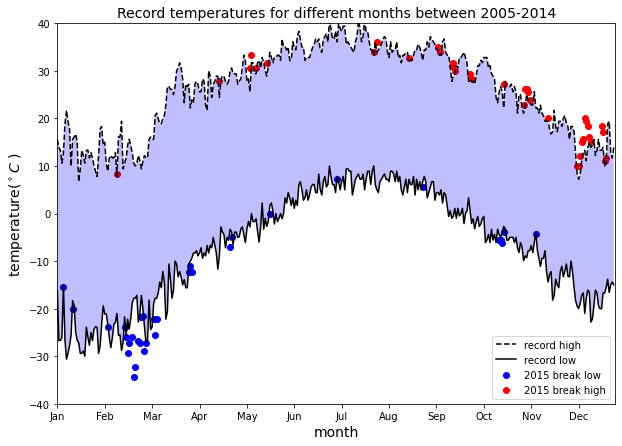

In [4]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(len(record_max)),record_max, '--k', label="record high")
plt.plot(np.arange(len(record_max)),record_min, '-k',label="record low")

plt.scatter(np.where(record_2015_min < record_min.values),
            record_2015_min[record_2015_min < 
            record_min].values,c='b',label='2015 break low')
plt.scatter(np.where(record_2015_max > record_max.values),
            record_2015_max[record_2015_max >      
            record_max].values,c='r',label='2015 break high')

plt.xlabel('month',size=14)
plt.ylabel('temperature($^\circ C$ )',size=14)
plt.xticks(np.arange(0,365,31),
          ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',   
           'Sep','Oct','Nov','Dec'])
ax=plt.gca()
ax.axis([0,365,-40,40])
plt.gca().fill_between(np.arange(0,365), 
                       record_min, record_max, 
                       facecolor='blue', 
                       alpha=0.25)
plt.title('Record temperatures for different months between 2005-2014',size=14)
plt.legend(loc=0)

plt.show()

In [27]:
rain_plot = pd.read_csv("rainfall-monthly-total.csv",skiprows =range(1,433))  #skip data but keep header
rain_plot.head()
#rain_plot.tail()


,month,total_rainfall
0,2018-01,287.0
1,2018-02,14.8
2,2018-03,44.6
3,2018-04,61.2
4,2018-05,132.2


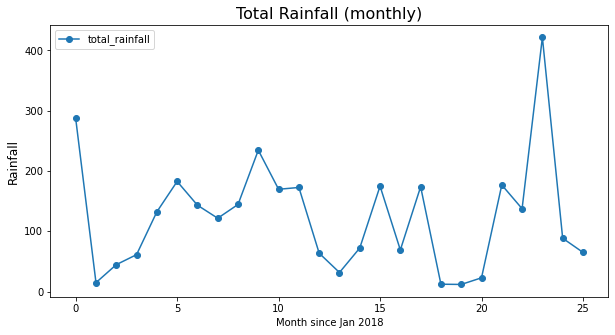

In [28]:
fig, ax1 = plt.subplots()
ax1.set_title("Total Rainfall (monthly)", fontsize=16)

rain_plot.plot(kind='line', y='total_rainfall', ax=ax1, figsize=(10,5), marker='o')

plt.xlabel("Month since Jan 2018")

plt.ylabel("Rainfall", fontsize=12)
plt.legend()

plt.show()

In [14]:
temp_plot = pd.read_csv("wet-bulb-temperature-hourly.csv",skiprows =range(1,334000))  #skip data but keep header
temp_plot.head()
temp_plot.tail()



,wbt_date,wbt_time,wet_bulb_temperature
532,2020-02-29,20,24.5
533,2020-02-29,21,24.2
534,2020-02-29,22,24.2
535,2020-02-29,23,24.1
536,2020-02-29,24,23.8


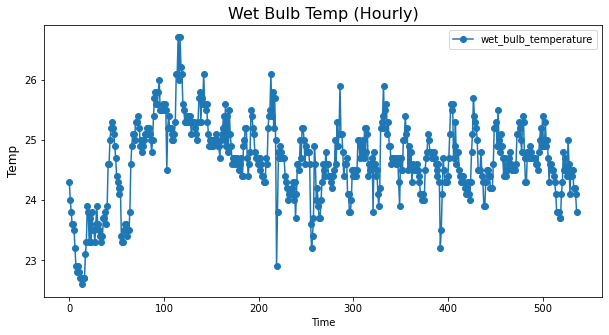

In [16]:
fig, ax1 = plt.subplots()
ax1.set_title("Wet Bulb Temp (Hourly)", fontsize=16)

temp_plot.plot(kind='line', y='wet_bulb_temperature', ax=ax1, figsize=(10,5), marker='o')

plt.xlabel("Time")

plt.ylabel("Temp", fontsize=12)
plt.legend()

plt.show()


In [5]:
from vega_datasets import data

df = data.seattle_temps()
df.head()

,date,temp
0,2010-01-01 00:00:00,39.4
1,2010-01-01 01:00:00,39.2
2,2010-01-01 02:00:00,39.0
3,2010-01-01 03:00:00,38.9
4,2010-01-01 04:00:00,38.8


In [6]:
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day_name()
df['hour']=df['date'].dt.hour
df['date']=df['date'].dt.date        #changed data to exclude time
df.head()

,date,temp,month,day,hour
0,2010-01-01,39.4,January,Friday,0
1,2010-01-01,39.2,January,Friday,1
2,2010-01-01,39.0,January,Friday,2
3,2010-01-01,38.9,January,Friday,3
4,2010-01-01,38.8,January,Friday,4


In [7]:
df1 = df.groupby(['month', 'hour'],sort=False).agg(['mean'])   # compute average for every month and hour
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
df1.head()

,month,hour,mean
0,January,0,40.712903
1,January,1,40.396774
2,January,2,40.190323
3,January,3,39.990323
4,January,4,39.735484


Seaborn’s heatmap function expects the data to be in wide form; months on rows and hours on columns. Our data is in tidy long form.

We can reshape the data in long tidy form to wide form using Pandas’s pivot_table() function. To reshape the data with pivot_table, we need to specify which variable should go to column using columns argument, which variable should be index using index argument and which variable will be the values in the wide table using values argument.

In [17]:
# pandas pivot with multiple variables
heatmap_data = pd.pivot_table(df1, values='mean', index=['month'], columns='hour')
# print to see few rows and columns
print(heatmap_data.iloc[0:3, 0:3])  # integer-location based indexing for selection by position

hour              0          1          2
month                                    
April     46.563333  45.876667  45.276667
August    61.158065  60.138710  59.177419
December  39.635484  39.419355  39.251613


In [22]:
months=df1.month.unique().tolist() # arrange month in order, instead of alphabets
print(months)
heatmap_data=heatmap_data.loc[months] # change months order

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


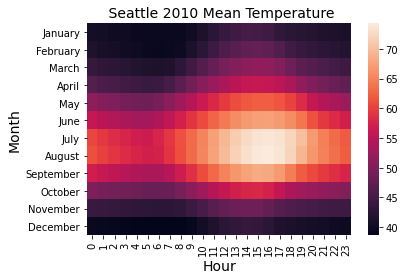

In [23]:
sns.heatmap(heatmap_data)
plt.xlabel("Hour", size=14)
plt.ylabel("Month", size=14)
plt.title(" Seattle 2010 Mean Temperature", size=14)
plt.tight_layout()
#plt.savefig('heatmap_with_Seaborn_python.jpg',dpi=150, figsize=(9,6))

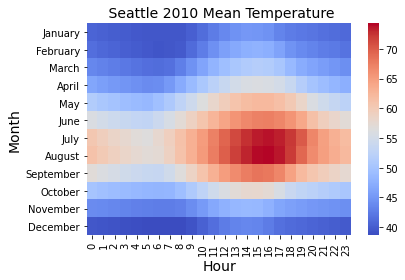

In [24]:
sns.heatmap(heatmap_data,cmap="coolwarm")
plt.xlabel("Hour", size=14)
plt.ylabel("Month", size=14)
plt.title(" Seattle 2010 Mean Temperature", size=14)
plt.tight_layout()

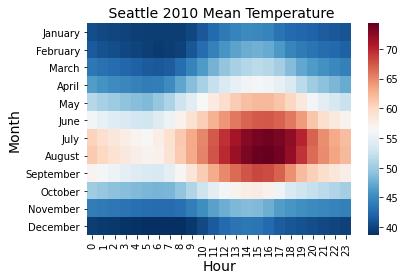

In [25]:
sns.heatmap(heatmap_data,cmap="RdBu_r")
plt.xlabel("Hour", size=14)
plt.ylabel("Month", size=14)
plt.title(" Seattle 2010 Mean Temperature", size=14)
plt.tight_layout()